In [7]:
from PIL import Image
import numpy as np

# Load the image
image_path = 'preprocessed_output_2014/matched_buffer_2014.png'
image = Image.open(image_path)

# Convert image to grayscale
gray_image = image.convert('L')

# Convert the grayscale image to a numpy array
image_array = np.array(gray_image)

# Flatten the array to make it one-dimensional for easier sorting
flat_array = image_array.flatten()

# Find the indices of the top 5 lightest pixels
# Since we are looking for the lightest, we sort in descending order
indices = np.argsort(flat_array)[-5:]

# Convert 1D indices back to 2D coordinates
rows, cols = image_array.shape
top_pixels = [(index // cols, index % cols) for index in indices]

# Print the coordinates and their corresponding pixel values
for coord in top_pixels:
    print(f"Coordinates: {coord}, Pixel Value: {image_array[coord]}")

Coordinates: (np.int64(62), np.int64(100)), Pixel Value: 248
Coordinates: (np.int64(61), np.int64(81)), Pixel Value: 249
Coordinates: (np.int64(62), np.int64(102)), Pixel Value: 250
Coordinates: (np.int64(61), np.int64(80)), Pixel Value: 251
Coordinates: (np.int64(62), np.int64(101)), Pixel Value: 254


In [6]:
from PIL import Image
import numpy as np

# Load the .tif image
image_path = 'preprocessed_output_2014/matched_buffer_2014.tif'  # Update the path if necessary
image = Image.open(image_path)

# Convert image to grayscale to find the lightest pixels
gray_image = image.convert('L')
image_array = np.array(gray_image)

# Flatten the array to make it one-dimensional for easier sorting
flat_array = image_array.flatten()

# Find the indices of the top 5 lightest pixels
indices = np.argsort(flat_array)[-5:]

# Convert 1D indices back to 2D coordinates
rows, cols = image_array.shape
top_pixels = [(index // cols, index % cols) for index in indices]

# Load the original image again to mark the pixels in color
color_image = image.convert('RGB')
pixels = color_image.load()

# Mark the pixels with red color
for coord in top_pixels:
    pixels[coord[1], coord[0]] = (255, 0, 0)  # Set to red

# Display the modified image
color_image.show()

# Optionally, save the modified image
color_image.save('preprocessed_output_2014/marked_matched_buffer_2014.tif')

UnidentifiedImageError: cannot identify image file 'preprocessed_output_2014/matched_buffer_2014.tif'

In [8]:
from PIL import Image
import numpy as np

# Ensure Pillow is up to date and has the necessary support for TIFF files
# You might need to restart your Jupyter kernel after installing dependencies

# Load the .tif image
image_path = '/Users/devparagiri/Research/tree-mortality-v3/preprocessed_output_2014/matched_buffer_2014.tif'  # Full path
try:
    image = Image.open(image_path)
except IOError:
    print("Error: The file could not be opened. Check the file path and file integrity.")

# Convert image to grayscale to find the lightest pixels
gray_image = image.convert('L')
image_array = np.array(gray_image)

# Flatten the array to make it one-dimensional for easier sorting
flat_array = image_array.flatten()

# Find the indices of the top 5 lightest pixels
indices = np.argsort(flat_array)[-5:]

# Convert 1D indices back to 2D coordinates
rows, cols = image_array.shape
top_pixels = [(index // cols, index % cols) for index in indices]

# Load the original image again to mark the pixels in color
color_image = image.convert('RGB')
pixels = color_image.load()

# Mark the pixels with red color
for coord in top_pixels:
    pixels[coord[1], coord[0]] = (255, 0, 0)  # Set to red

# Display the modified image
color_image.show()

# Save the modified image to a new file to avoid overwriting the original
output_path = '/Users/devparagiri/Research/tree-mortality-v3/preprocessed_output_2014/marked_matched_buffer_2014.png'
color_image.save(output_path)

Error: The file could not be opened. Check the file path and file integrity.


In [1]:
import rasterio
import numpy as np
from skimage.metrics import mean_squared_error

# === CONFIG ===
RASTER_PATH = "preprocessed_output_2014/matched_buffer_2014.tif"

# Manually extracted RGB values of the 2x2 patch (you can update these)
# Format: [top-left, top-right, bottom-left, bottom-right] as RGB triples
target_patch = np.array([
    [138, 134, 144],  # top-left
    [202, 215, 222],  # top-right
    [138, 132, 140],  # bottom-left
    [164, 168, 158],  # bottom-right
], dtype=np.uint8).reshape((2, 2, 3))

# === LOAD RGB bands ===
with rasterio.open(RASTER_PATH) as src:
    bands = src.read([1, 2, 3])  # shape: (3, H, W)
    height, width = bands.shape[1], bands.shape[2]
    rgb = np.transpose(bands, (1, 2, 0))  # shape: (H, W, 3)

# === SEARCH for best 2x2 patch match ===
best_score = float('inf')
best_loc = (0, 0)

for r in range(height - 1):
    for c in range(width - 1):
        patch = rgb[r:r+2, c:c+2, :]
        if patch.shape != (2, 2, 3):
            continue
        score = mean_squared_error(patch, target_patch)
        if score < best_score:
            best_score = score
            best_loc = (r, c)

print(f"✅ Closest match found at: row={best_loc[0]}, col={best_loc[1]}")
print(f"📉 MSE: {best_score:.2f}")

✅ Closest match found at: row=61, col=80
📉 MSE: 1237.08


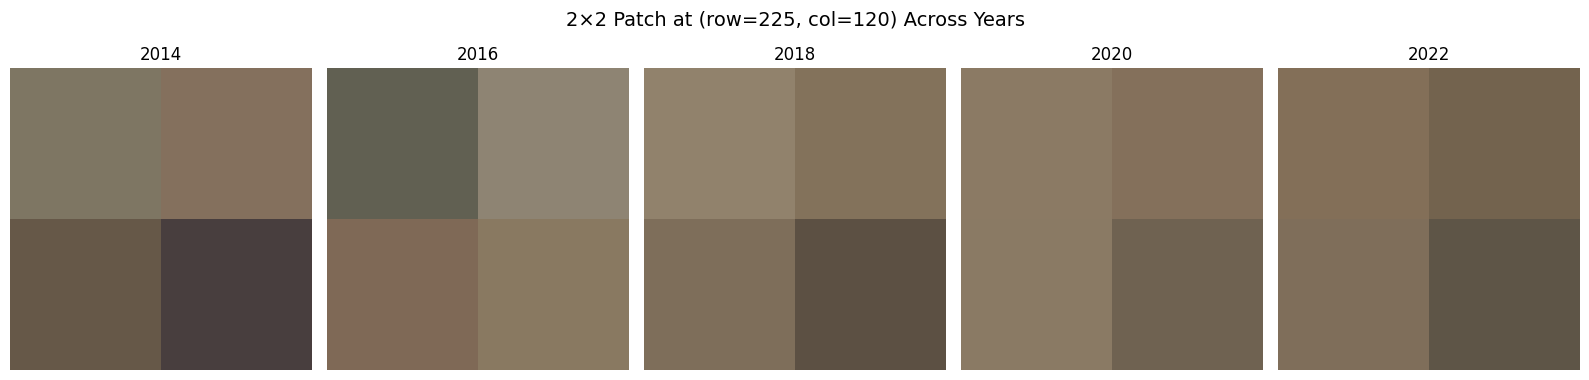

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio

YEARS = [2014, 2016, 2018, 2020, 2022]
BASE_PATH = "preprocessed_output_{year}/matched_buffer_{year}.tif"
row, col = 225, 120  # from your match

fig, axs = plt.subplots(1, len(YEARS), figsize=(16, 4))
for i, year in enumerate(YEARS):
    path = BASE_PATH.format(year=year)
    with rasterio.open(path) as src:
        rgb = src.read([1, 2, 3])  # shape: (3, H, W)
        patch = rgb[:, row:row+2, col:col+2]
        patch = np.transpose(patch, (1, 2, 0))  # shape: (2, 2, 3)

    axs[i].imshow(patch.astype(np.uint8))
    axs[i].set_title(f"{year}")
    axs[i].axis("off")

plt.suptitle(f"2×2 Patch at (row={row}, col={col}) Across Years", fontsize=14)
plt.tight_layout()
plt.show()

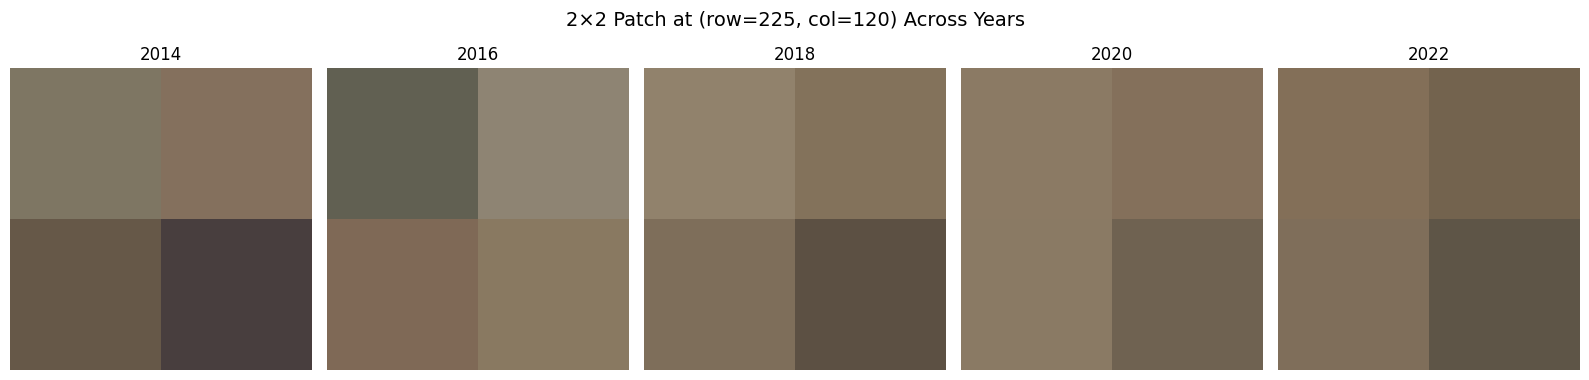

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio

YEARS = [2014, 2016, 2018, 2020, 2022]
BASE_PATH = "preprocessed_output_{year}/matched_buffer_{year}.tif"
row, col = 225, 120  # from your match

fig, axs = plt.subplots(1, len(YEARS), figsize=(16, 4))
for i, year in enumerate(YEARS):
    path = BASE_PATH.format(year=year)
    with rasterio.open(path) as src:
        rgb = src.read([1, 2, 3])  # shape: (3, H, W)
        patch = rgb[:, row:row+2, col:col+2]
        patch = np.transpose(patch, (1, 2, 0))  # shape: (2, 2, 3)

    axs[i].imshow(patch.astype(np.uint8))
    axs[i].set_title(f"{year}")
    axs[i].axis("off")

plt.suptitle(f"2×2 Patch at (row={row}, col={col}) Across Years", fontsize=14)
plt.tight_layout()
plt.show()

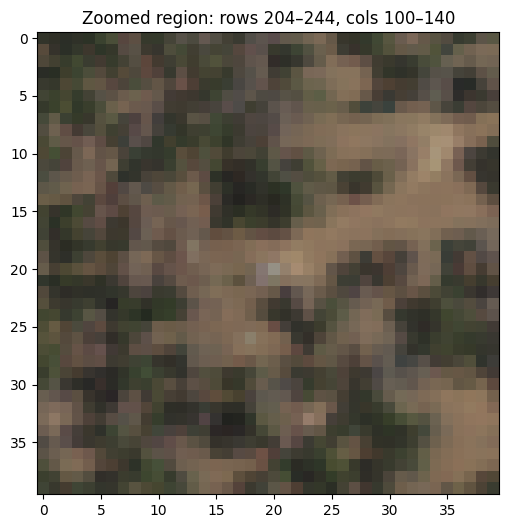

In [17]:
import matplotlib.pyplot as plt
import rasterio

with rasterio.open("preprocessed_output_2014/matched_buffer_2014.tif") as src:
    rgb = src.read([1, 2, 3])
    img = rgb.transpose(1, 2, 0).astype("uint8")

# === Manually set center region to zoom into
center_row, center_col = 224, 120  # Try tweaking this to find your bright patch
window_size = 20  # pixels

# === Slice a window around the center
r0 = max(center_row - window_size, 0)
r1 = center_row + window_size
c0 = max(center_col - window_size, 0)
c1 = center_col + window_size

zoomed = img[r0:r1, c0:c1]

plt.figure(figsize=(6, 6))
plt.imshow(zoomed)
plt.title(f"Zoomed region: rows {r0}–{r1}, cols {c0}–{c1}")
plt.axis("on")
plt.show()

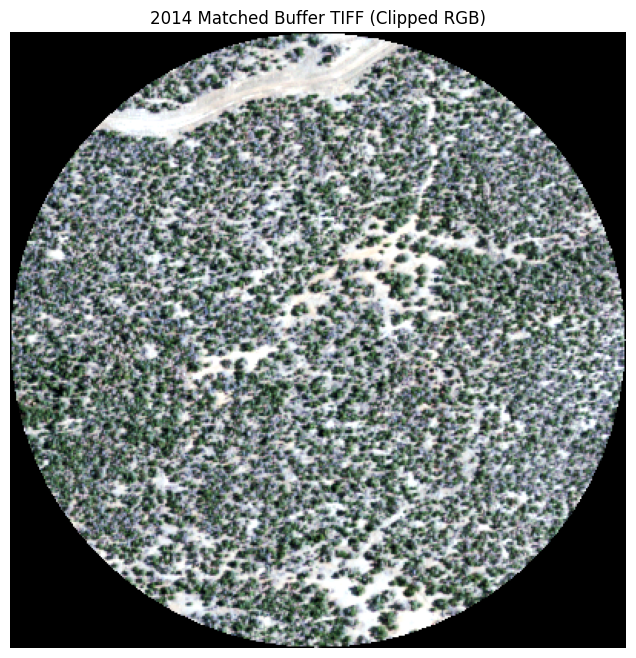

In [11]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

RASTER_PATH = "preprocessed_output_2014/matched_buffer_2014.tif"

with rasterio.open(RASTER_PATH) as src:
    data = src.read()
    
    if data.shape[0] >= 3:
        rgb = np.transpose(data[:3], (1, 2, 0)).astype("float32")

        # Per-channel normalization with clipping
        rgb_norm = np.zeros_like(rgb)
        for i in range(3):
            p2, p98 = np.percentile(rgb[:, :, i], (2, 98))
            rgb_norm[:, :, i] = np.clip((rgb[:, :, i] - p2) / (p98 - p2), 0, 1)

        plt.figure(figsize=(10, 8))
        plt.imshow(rgb_norm)
        plt.title("2014 Matched Buffer TIFF (Clipped RGB)")
        plt.axis("off")
        plt.show()
    else:
        plt.imshow(data[0], cmap='gray')
        plt.title("2014 Matched Buffer TIFF (Single Band)")
        plt.axis("off")
        plt.colorbar()
        plt.show()

In [18]:
import rasterio
import numpy as np

# Set row, col found in QGIS
row = 225
col = 120

# Bands: Red = 1, Green = 2, Blue = 3, NIR = 4
YEARS = [2014, 2016, 2018, 2020, 2022]
TEMPLATE = "preprocessed_output_{year}/matched_buffer_{year}.tif"

print(f"📍 Extracting pixel at (row={row}, col={col}) across all years:\n")

for year in YEARS:
    path = TEMPLATE.format(year=year)
    with rasterio.open(path) as src:
        red = float(src.read(1)[row, col])
        green = float(src.read(2)[row, col])
        blue = float(src.read(3)[row, col])
        nir = float(src.read(4)[row, col])
        ndvi = (nir - red) / (nir + red + 1e-6)
        
        print(f"🗓️ {year} | R: {int(red)} G: {int(green)} B: {int(blue)} NIR: {int(nir)} | NDVI: {ndvi:.3f}")

📍 Extracting pixel at (row=225, col=120) across all years:

🗓️ 2014 | R: 126 G: 118 B: 99 NIR: 106 | NDVI: -0.086
🗓️ 2016 | R: 97 G: 96 B: 82 NIR: 96 | NDVI: -0.005
🗓️ 2018 | R: 145 G: 130 B: 108 NIR: 130 | NDVI: -0.055
🗓️ 2020 | R: 139 G: 122 B: 100 NIR: 120 | NDVI: -0.073
🗓️ 2022 | R: 131 G: 111 B: 88 NIR: 122 | NDVI: -0.036


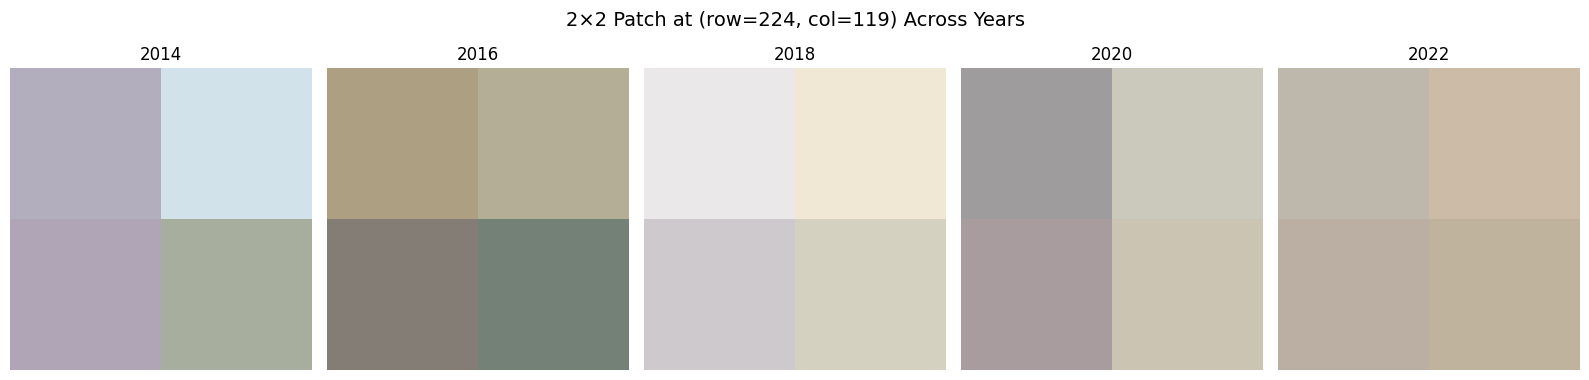

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

YEARS = [2014, 2016, 2018, 2020, 2022]
BASE_PATH = "preprocessed_output_{year}/matched_buffer_{year}.png"
row, col = 224, 119  # from your match

fig, axs = plt.subplots(1, len(YEARS), figsize=(16, 4))
for i, year in enumerate(YEARS):
    path = BASE_PATH.format(year=year)
    
    # Load PNG image using PIL
    with Image.open(path) as img:
        img_array = np.array(img)  # shape: (H, W, 3) for RGB
        patch = img_array[row:row+2, col:col+2]  # shape: (2, 2, 3)

    axs[i].imshow(patch.astype(np.uint8))
    axs[i].set_title(f"{year}")
    axs[i].axis("off")

plt.suptitle(f"2×2 Patch at (row={row}, col={col}) Across Years", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import rasterio
import numpy as np
import random
from tqdm import tqdm

# === CONFIG ===
random.seed(42)
YEARS = [2014, 2016, 2018]
RASTER_PATH = "preprocessed_output_{year}/matched_buffer_{year}.tif"
PRED_PATH = "predicted_rasters/predicted_class_map_{year}.tif"
SAMPLES = 1000
PATCH_RADIUS = 1  # 3x3 search
IMG_BANDS = [1, 2, 3, 4]  # RGBNIR

# === Load predicted rasters ===
def load_predictions():
    preds = {}
    for year in YEARS:
        with rasterio.open(PRED_PATH.format(year=year)) as src:
            preds[year] = src.read(1)
    return preds

# === Load RGBNIR images ===
def load_images():
    imgs = {}
    for year in YEARS:
        with rasterio.open(RASTER_PATH.format(year=year)) as src:
            imgs[year] = src.read(IMG_BANDS)
    return imgs

# === Find closest spectral match in a window ===
def find_best_match(ref_pixel, tgt_img, row, col):
    h, w = tgt_img.shape[1:]
    best_dist = float("inf")
    best_loc = (row, col)

    for dr in range(-PATCH_RADIUS, PATCH_RADIUS + 1):
        for dc in range(-PATCH_RADIUS, PATCH_RADIUS + 1):
            rr, cc = row + dr, col + dc
            if rr < 0 or rr >= h or cc < 0 or cc >= w:
                continue
            tgt_pixel = tgt_img[:, rr, cc]
            dist = np.linalg.norm(ref_pixel - tgt_pixel)
            if dist < best_dist:
                best_dist = dist
                best_loc = (rr, cc)

    return best_loc

# === Check if transition is implausible ===
def is_implausible(prev, curr):
    # 0 = LIVE, 1 = DEAD, 2 = BARE
    return (prev == 2 and curr == 0) or (prev == 1 and curr == 0)

# === Main analysis ===
def analyze_transitions(preds, imgs):
    h, w = preds[2014].shape
    fixed_bad, corrected_bad = 0, 0

    for _ in tqdm(range(SAMPLES), desc="Analyzing transitions"):
        row = random.randint(5, h - 6)
        col = random.randint(5, w - 6)

        # === Fixed transition check
        seq = [preds[year][row, col] for year in YEARS]
        for i in range(len(seq) - 1):
            if is_implausible(seq[i], seq[i + 1]):
                fixed_bad += 1
                break

        # === Drift-corrected transition check
        r, c = row, col
        seq_corr = [preds[YEARS[0]][r, c]]

        for i in range(len(YEARS) - 1):
            y1, y2 = YEARS[i], YEARS[i + 1]
            ref_vec = imgs[y1][:, r, c]
            tgt_img = imgs[y2]

            r, c = find_best_match(ref_vec, tgt_img, r, c)
            seq_corr.append(preds[y2][r, c])

        for i in range(len(seq_corr) - 1):
            if is_implausible(seq_corr[i], seq_corr[i + 1]):
                corrected_bad += 1
                break

    return fixed_bad, corrected_bad

# === Run ===
preds = load_predictions()
imgs = load_images()

fixed, corrected = analyze_transitions(preds, imgs)

print(f"\n🚨 Implausible Transitions Summary:")
print(f"Fixed     → {fixed} / {SAMPLES} ({fixed/SAMPLES:.2%})")
print(f"Corrected → {corrected} / {SAMPLES} ({corrected/SAMPLES:.2%})")

Analyzing transitions: 100%|██████████| 1000/1000 [00:00<00:00, 17648.49it/s]


🚨 Implausible Transitions Summary:
Fixed     → 138 / 1000 (13.80%)
Corrected → 153 / 1000 (15.30%)


In [ ]:
import rasterio
import numpy as np
import random
from tqdm import tqdm

# === CONFIG ===
random.seed(42)
YEARS = [2014, 2016, 2018]
RASTER_PATH = "preprocessed_output_{year}/matched_buffer_{year}.tif"
PRED_PATH = "predicted_rasters/predicted_class_map_{year}.tif"
SAMPLES = 1000
PATCH_RADIUS = 1  # 3x3 search
IMG_BANDS = [1, 2, 3, 4]  # RGBNIR

# === Load predicted rasters ===
def load_predictions():
    preds = {}
    for year in YEARS:
        with rasterio.open(PRED_PATH.format(year=year)) as src:
            preds[year] = src.read(1)
    return preds

# === Load RGBNIR images ===
def load_images():
    imgs = {}
    for year in YEARS:
        with rasterio.open(RASTER_PATH.format(year=year)) as src:
            imgs[year] = src.read(IMG_BANDS)
    return imgs

# === Find closest spectral match in a window ===
def find_best_match(ref_pixel, tgt_img, row, col):
    h, w = tgt_img.shape[1:]
    best_dist = float("inf")
    best_loc = (row, col)

    for dr in range(-PATCH_RADIUS, PATCH_RADIUS + 1):
        for dc in range(-PATCH_RADIUS, PATCH_RADIUS + 1):
            rr, cc = row + dr, col + dc
            if rr < 0 or rr >= h or cc < 0 or cc >= w:
                continue
            tgt_pixel = tgt_img[:, rr, cc]
            dist = np.linalg.norm(ref_pixel - tgt_pixel)
            if dist < best_dist:
                best_dist = dist
                best_loc = (rr, cc)

    return best_loc

# === Check if transition is implausible ===
def is_implausible(prev, curr):
    # 0 = LIVE, 1 = DEAD, 2 = BARE
    return (prev == 2 and curr == 0) or (prev == 1 and curr == 0)

# === Main analysis ===
def analyze_transitions(preds, imgs):
    h, w = preds[2014].shape
    fixed_bad, corrected_bad = 0, 0

    for _ in tqdm(range(SAMPLES), desc="Analyzing transitions"):
        row = random.randint(5, h - 6)
        col = random.randint(5, w - 6)

        # === Fixed transition check
        seq = [preds[year][row, col] for year in YEARS]
        for i in range(len(seq) - 1):
            if is_implausible(seq[i], seq[i + 1]):
                fixed_bad += 1
                break

        # === Drift-corrected transition check
        r, c = row, col
        seq_corr = [preds[YEARS[0]][r, c]]

        for i in range(len(YEARS) - 1):
            y1, y2 = YEARS[i], YEARS[i + 1]
            ref_vec = imgs[y1][:, r, c]
            tgt_img = imgs[y2]

            r, c = find_best_match(ref_vec, tgt_img, r, c)
            seq_corr.append(preds[y2][r, c])

        for i in range(len(seq_corr) - 1):
            if is_implausible(seq_corr[i], seq_corr[i + 1]):
                corrected_bad += 1
                break

    return fixed_bad, corrected_bad

# === Run ===
preds = load_predictions()
imgs = load_images()

fixed, corrected = analyze_transitions(preds, imgs)

print(f"\n🚨 Implausible Transitions Summary:")
print(f"Fixed     → {fixed} / {SAMPLES} ({fixed/SAMPLES:.2%})")
print(f"Corrected → {corrected} / {SAMPLES} ({corrected/SAMPLES:.2%})")

Analyzing transitions: 100%|██████████| 1000/1000 [00:00<00:00, 17648.49it/s]


🚨 Implausible Transitions Summary:
Fixed     → 138 / 1000 (13.80%)
Corrected → 153 / 1000 (15.30%)


In [ ]:
import rasterio
import numpy as np
import random
from tqdm import tqdm

# === CONFIG ===
random.seed(42)
YEARS = [2014, 2016, 2018]
RASTER_PATH = "preprocessed_output_{year}/matched_buffer_{year}.tif"
PRED_PATH = "predicted_rasters/predicted_class_map_{year}.tif"
SAMPLES = 1000
PATCH_RADIUS = 1  # 3x3 search
IMG_BANDS = [1, 2, 3, 4]  # RGBNIR

# === Load predicted rasters ===
def load_predictions():
    preds = {}
    for year in YEARS:
        with rasterio.open(PRED_PATH.format(year=year)) as src:
            preds[year] = src.read(1)
    return preds

# === Load RGBNIR images ===
def load_images():
    imgs = {}
    for year in YEARS:
        with rasterio.open(RASTER_PATH.format(year=year)) as src:
            imgs[year] = src.read(IMG_BANDS)
    return imgs

# === Find closest spectral match in a window ===
def find_best_match(ref_pixel, tgt_img, row, col):
    h, w = tgt_img.shape[1:]
    best_dist = float("inf")
    best_loc = (row, col)

    for dr in range(-PATCH_RADIUS, PATCH_RADIUS + 1):
        for dc in range(-PATCH_RADIUS, PATCH_RADIUS + 1):
            rr, cc = row + dr, col + dc
            if rr < 0 or rr >= h or cc < 0 or cc >= w:
                continue
            tgt_pixel = tgt_img[:, rr, cc]
            dist = np.linalg.norm(ref_pixel - tgt_pixel)
            if dist < best_dist:
                best_dist = dist
                best_loc = (rr, cc)

    return best_loc

# === Check if transition is implausible ===
def is_implausible(prev, curr):
    # 0 = LIVE, 1 = DEAD, 2 = BARE
    return (prev == 2 and curr == 0) or (prev == 1 and curr == 0)

# === Main analysis ===
def analyze_transitions(preds, imgs):
    h, w = preds[2014].shape
    fixed_bad, corrected_bad = 0, 0

    for _ in tqdm(range(SAMPLES), desc="Analyzing transitions"):
        row = random.randint(5, h - 6)
        col = random.randint(5, w - 6)

        # === Fixed transition check
        seq = [preds[year][row, col] for year in YEARS]
        for i in range(len(seq) - 1):
            if is_implausible(seq[i], seq[i + 1]):
                fixed_bad += 1
                break

        # === Drift-corrected transition check
        r, c = row, col
        seq_corr = [preds[YEARS[0]][r, c]]

        for i in range(len(YEARS) - 1):
            y1, y2 = YEARS[i], YEARS[i + 1]
            ref_vec = imgs[y1][:, r, c]
            tgt_img = imgs[y2]

            r, c = find_best_match(ref_vec, tgt_img, r, c)
            seq_corr.append(preds[y2][r, c])

        for i in range(len(seq_corr) - 1):
            if is_implausible(seq_corr[i], seq_corr[i + 1]):
                corrected_bad += 1
                break

    return fixed_bad, corrected_bad

# === Run ===
preds = load_predictions()
imgs = load_images()

fixed, corrected = analyze_transitions(preds, imgs)

print(f"\n🚨 Implausible Transitions Summary:")
print(f"Fixed     → {fixed} / {SAMPLES} ({fixed/SAMPLES:.2%})")
print(f"Corrected → {corrected} / {SAMPLES} ({corrected/SAMPLES:.2%})")

Analyzing transitions: 100%|██████████| 1000/1000 [00:00<00:00, 17648.49it/s]


🚨 Implausible Transitions Summary:
Fixed     → 138 / 1000 (13.80%)
Corrected → 153 / 1000 (15.30%)


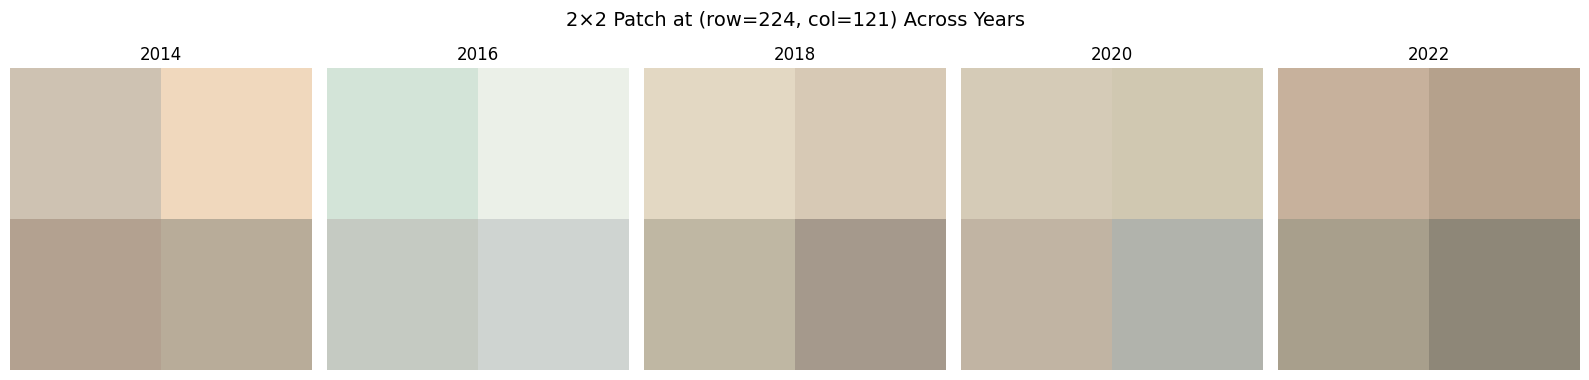

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

YEARS = [2014, 2016, 2018, 2020, 2022]
BASE_PATH = "preprocessed_output_{year}/matched_buffer_{year}.png"
row, col = 224, 121  # from your match

fig, axs = plt.subplots(1, len(YEARS), figsize=(16, 4))
for i, year in enumerate(YEARS):
    path = BASE_PATH.format(year=year)
    
    # Load PNG image using PIL
    with Image.open(path) as img:
        img_array = np.array(img)  # shape: (H, W, 3) for RGB
        patch = img_array[row:row+2, col:col+2]  # shape: (2, 2, 3)

    axs[i].imshow(patch.astype(np.uint8))
    axs[i].set_title(f"{year}")
    axs[i].axis("off")

plt.suptitle(f"2×2 Patch at (row={row}, col={col}) Across Years", fontsize=14)
plt.tight_layout()
plt.show()

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# === CONFIG ===
YEARS = [2014, 2016, 2018, 2020, 2022]
PATCH_SIZE = 5
CENTER_ROW, CENTER_COL = 119, 224  # your known location
NODATA = 255

# === FILE PATHS ===
def raster_path(year):
    return f"preprocessed_output_{year}/matched_buffer_{year}.tif"

def pred_path(year):
    return f"predicted_rasters/predicted_class_map_{year}.tif"

# === UTILS ===
def extract_patch(data, row, col):
    half = PATCH_SIZE // 2
    return data[
        :, 
        row - half : row + half + 1,
        col - half : col + half + 1
    ]

def compute_ndvi(red, nir):
    return (nir - red) / (nir + red + 1e-6)

# === ANALYSIS ===
results = []

for year in YEARS:
    print(f"\n📅 Year: {year}")
    
    # Load raster bands
    with rasterio.open(raster_path(year)) as src:
        bands = src.read()  # shape: (bands, H, W)
        red_patch = red_patch.astype(np.float32) / 255.0
        nir_patch = nir_patch.astype(np.float32) / 255.0

        ndvi_patch = (nir_patch - red_patch) / (nir_patch + red_patch + 1e-6)
        ndvi_mean = np.mean(ndvi_patch)
            
    # Load prediction map
    with rasterio.open(pred_path(year)) as pred_src:
        pred = pred_src.read(1)
        class_patch = extract_patch(pred[np.newaxis, :, :], CENTER_ROW, CENTER_COL)[0]
        class_patch_flat = class_patch[class_patch != NODATA]
        class_counts = dict(Counter(class_patch_flat))
        most_common_class = max(class_counts, key=class_counts.get) if len(class_counts) else None

    results.append({
        "year": year,
        "ndvi_mean": ndvi_mean,
        "class_mode": most_common_class,
        "class_counts": class_counts
    })

# === OUTPUT ===
print("\n🔍 Patch-Level Summary (centered at r=119, c=224):")
for r in results:
    print(f"Year {r['year']} | NDVI mean: {r['ndvi_mean']} | Mode class: {r['class_mode']} | Class counts: {r['class_counts']}")


📅 Year: 2014

📅 Year: 2016

📅 Year: 2018

📅 Year: 2020

📅 Year: 2022

🔍 Patch-Level Summary (centered at r=119, c=224):
Year 2014 | NDVI mean: 0.1193753331899643 | Mode class: 1 | Class counts: {np.uint8(1): 14, np.uint8(2): 10, np.uint8(0): 1}
Year 2016 | NDVI mean: 0.11932488530874252 | Mode class: 1 | Class counts: {np.uint8(1): 14, np.uint8(0): 2, np.uint8(2): 9}
Year 2018 | NDVI mean: 0.10775315016508102 | Mode class: 2 | Class counts: {np.uint8(1): 8, np.uint8(0): 5, np.uint8(2): 12}
Year 2020 | NDVI mean: 0.004308183677494526 | Mode class: 2 | Class counts: {np.uint8(2): 12, np.uint8(1): 9, np.uint8(0): 4}
Year 2022 | NDVI mean: 1.754504228301812e-05 | Mode class: 2 | Class counts: {np.uint8(1): 5, np.uint8(0): 8, np.uint8(2): 12}


In [3]:
import numpy as np
import rasterio
from collections import Counter
from tqdm import tqdm

# === CONFIG ===
REFERENCE_YEAR = 2014
YEARS = [2014, 2016, 2018, 2020, 2022]
CENTER_R, CENTER_C = 119, 224  # top-left of 5x5 is CENTER_R-2, CENTER_C-2
PATCH_SIZE = 5

RASTER_DIR = "predicted_rasters/predicted_class_map_{year}.tif"
NDVI_DIR = "preprocessed_output_{year}/matched_buffer_{year}.tif"
NODATA_CLASS = 255

def extract_patch(arr, center_r, center_c, size=PATCH_SIZE):
    half = size // 2
    r0, r1 = center_r - half, center_r + half + 1
    c0, c1 = center_c - half, center_c + half + 1
    return arr[r0:r1, c0:c1]

def get_prediction_array(year):
    path = RASTER_DIR.format(year=year)
    with rasterio.open(path) as src:
        return src.read(1)

def compute_patch_ndvi(year):
    path = NDVI_DIR.format(year=year)
    with rasterio.open(path) as src:
        bands = src.read()  # shape (4, H, W)
        red, nir = bands[0], bands[3]
        ndvi = (nir - red) / (nir + red + 1e-6)
    return ndvi

# === Step 1: Compute reference NDVI patch from 2014
ndvi_ref = compute_patch_ndvi(REFERENCE_YEAR)
ref_patch = extract_patch(ndvi_ref, CENTER_R, CENTER_C)

# === Step 2: Find best row shift for each year (to align NDVI patches)
optimal_row_shifts = {}

for year in YEARS:
    if year == REFERENCE_YEAR:
        optimal_row_shifts[year] = 0
        continue

    ndvi = compute_patch_ndvi(year)
    best_shift = 0
    min_mse = float("inf")

    for shift in range(-3, 4):  # test ±3 rows
        patch = extract_patch(ndvi, CENTER_R + shift, CENTER_C)
        mse = np.mean((patch - ref_patch) ** 2)
        if mse < min_mse:
            min_mse = mse
            best_shift = shift

    optimal_row_shifts[year] = best_shift

print("📐 Optimal row shifts relative to 2014:")
for year in YEARS:
    print(f"🗓️ {year}: row shift = {optimal_row_shifts[year]}")

# === Step 3: Extract corrected class patches and summarize transitions
print("\n🔍 Patch-Level Summary (5x5 with drift-corrected alignment):")

for year in YEARS:
    pred = get_prediction_array(year)
    shift = optimal_row_shifts[year]
    patch = extract_patch(pred, CENTER_R + shift, CENTER_C)
    mode = Counter(patch.flat).most_common(1)[0][0]
    counts = dict(Counter(patch.flat))
    ndvi_mean = extract_patch(compute_patch_ndvi(year), CENTER_R + shift, CENTER_C).mean()

    print(f"Year {year} | NDVI mean: {ndvi_mean:.6f} | Mode class: {mode} | Class counts: {counts}")

📐 Optimal row shifts relative to 2014:
🗓️ 2014: row shift = 0
🗓️ 2016: row shift = -3
🗓️ 2018: row shift = -3
🗓️ 2020: row shift = 0
🗓️ 2022: row shift = -3

🔍 Patch-Level Summary (5x5 with drift-corrected alignment):
Year 2014 | NDVI mean: 22.178518 | Mode class: 1 | Class counts: {np.uint8(1): 14, np.uint8(2): 10, np.uint8(0): 1}
Year 2016 | NDVI mean: 14.442536 | Mode class: 1 | Class counts: {np.uint8(1): 19, np.uint8(2): 4, np.uint8(0): 2}
Year 2018 | NDVI mean: 0.148568 | Mode class: 1 | Class counts: {np.uint8(1): 15, np.uint8(0): 7, np.uint8(2): 3}
Year 2020 | NDVI mean: 118.822552 | Mode class: 2 | Class counts: {np.uint8(2): 12, np.uint8(1): 9, np.uint8(0): 4}
Year 2022 | NDVI mean: 21.296247 | Mode class: 1 | Class counts: {np.uint8(1): 14, np.uint8(0): 9, np.uint8(2): 2}


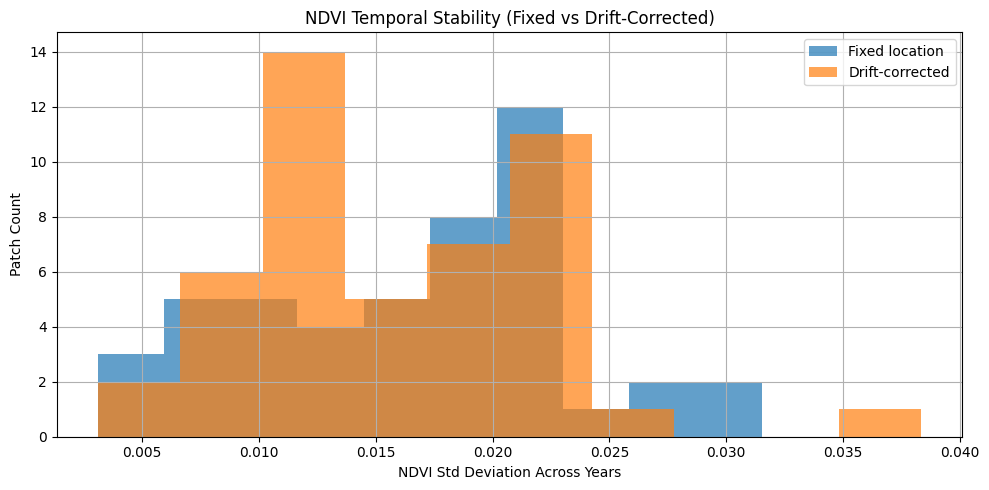


📊 Paired T-Test Results
Mean std (Fixed): 0.0165
Mean std (Corrected): 0.0157
T-statistic: 1.1652
P-value: 0.249938


In [10]:
import rasterio
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

YEARS = [2014, 2016, 2018, 2020, 2022]
PATCH_SIZE = 5
SEARCH_RADIUS = 3
SAMPLES = 47  # 22 random + 3 manual = 25 total

# === Load all NDVI maps ===
ndvi_maps = {}
for year in YEARS:
    with rasterio.open(f"preprocessed_output_{year}/matched_buffer_{year}.tif") as src:
        red = src.read(1).astype("float32")
        nir = src.read(4).astype("float32")
        ndvi = (nir - red) / (nir + red + 1e-6)
        ndvi_maps[year] = ndvi

height, width = ndvi_maps[2014].shape

# === Manual anchor points ===
manual_coords = [(119, 224), (121, 224), (118, 224)]  # (row, col)

# === Sample additional random patches (avoiding edges) ===
random_coords = []
while len(random_coords) < SAMPLES:
    r = random.randint(PATCH_SIZE, height - PATCH_SIZE - 1)
    c = random.randint(PATCH_SIZE, width - PATCH_SIZE - 1)
    if (r, c) not in manual_coords:
        random_coords.append((r, c))

all_coords = manual_coords + random_coords[:SAMPLES - len(manual_coords)]

ndvi_std_fixed = []
ndvi_std_corrected = []

# === For each patch ===
for center_r, center_c in all_coords:
    ref_patch = ndvi_maps[2014][center_r - 2:center_r + 3, center_c - 2:center_c + 3]
    means_fixed = []
    means_drift = []

    for year in YEARS:
        patch_fixed = ndvi_maps[year][center_r - 2:center_r + 3, center_c - 2:center_c + 3]
        means_fixed.append(np.mean(patch_fixed))

        # Search vertical offsets for best match to 2014 reference
        best_score = float("inf")
        best_patch = patch_fixed
        for offset in range(-SEARCH_RADIUS, SEARCH_RADIUS + 1):
            r_shift = center_r + offset
            if r_shift < 2 or r_shift > height - 3:
                continue
            candidate = ndvi_maps[year][r_shift - 2:r_shift + 3, center_c - 2:center_c + 3]
            mse = np.mean((candidate - ref_patch) ** 2)
            if mse < best_score:
                best_score = mse
                best_patch = candidate

        means_drift.append(np.mean(best_patch))

    ndvi_std_fixed.append(np.std(means_fixed))
    ndvi_std_corrected.append(np.std(means_drift))

# === Plot histograms ===
plt.figure(figsize=(10, 5))
plt.hist(ndvi_std_fixed, bins=10, alpha=0.7, label='Fixed location')
plt.hist(ndvi_std_corrected, bins=10, alpha=0.7, label='Drift-corrected')
plt.xlabel("NDVI Std Deviation Across Years")
plt.ylabel("Patch Count")
plt.title("NDVI Temporal Stability (Fixed vs Drift-Corrected)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Paired t-test ===
t_stat, p_val = ttest_rel(ndvi_std_fixed, ndvi_std_corrected)

print("\n📊 Paired T-Test Results")
print(f"Mean std (Fixed): {np.mean(ndvi_std_fixed):.4f}")
print(f"Mean std (Corrected): {np.mean(ndvi_std_corrected):.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.6f}")

Evaluating pixel-level NDVI drift:   0%|          | 0/25 [00:00<?, ?it/s]/var/folders/5g/yd1vdsh57t939808t_l412f00000gn/T/ipykernel_39355/3565089060.py:30: RuntimeWarning: overflow encountered in scalar subtract
  return (nir - red) / (nir + red + 1e-6)
Evaluating pixel-level NDVI drift: 100%|██████████| 25/25 [00:00<00:00, 82.46it/s]


📊 Pixel-Level NDVI Drift Comparison:
Mean std (Fixed): 41.64815
Mean std (Corrected): 13.54081
T-statistic: 2.4115
P-value: 0.023902


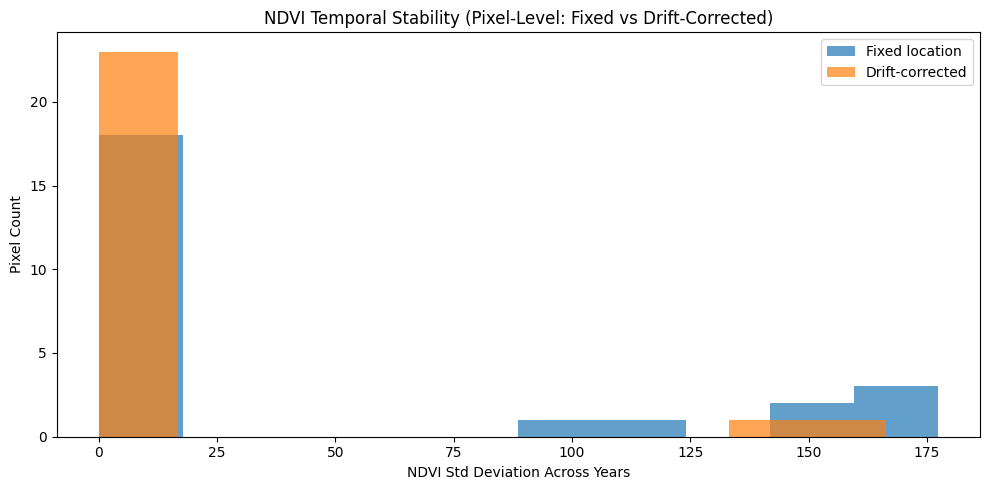

In [11]:
import numpy as np
import rasterio
import random
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
from tqdm import tqdm

# === CONFIG ===
YEARS = [2014, 2016, 2018, 2020, 2022]
RASTER_PATH = "preprocessed_output_{year}/matched_buffer_{year}.tif"
PATCHES = [(119, 224)]  # include fixed patch
NUM_RANDOM = 49
PATCH_RADIUS = 0  # single pixel

# === Sample more random points from 2014 image
with rasterio.open(RASTER_PATH.format(year=2014)) as src:
    height, width = src.height, src.width
    mask = src.read(1) != 0  # use red band for masking

while len(PATCHES) < 25:
    r, c = random.randint(10, height - 10), random.randint(10, width - 10)
    if mask[r, c]:
        PATCHES.append((r, c))

def extract_pixel_ndvi(image, r, c):
    red = image[0, r, c]
    nir = image[3, r, c]
    if (red + nir) == 0:
        return np.nan
    return (nir - red) / (nir + red + 1e-6)

def get_image(year):
    with rasterio.open(RASTER_PATH.format(year=year)) as src:
        return src.read()

def find_drifted_location(ref_patch, tgt_patch):
    """Find pixel with minimal MSE to the reference center pixel"""
    ref_r, ref_c = ref_patch
    ref_img = get_image(2014)
    ref_vec = ref_img[:4, ref_r, ref_c]

    min_dist, best_loc = float("inf"), (ref_r, ref_c)
    for dr in range(-3, 4):
        for dc in range(-3, 4):
            rr, cc = ref_r + dr, ref_c + dc
            if 0 <= rr < tgt_patch.shape[1] and 0 <= cc < tgt_patch.shape[2]:
                tgt_vec = tgt_patch[:4, rr, cc]
                dist = np.linalg.norm(ref_vec - tgt_vec)
                if dist < min_dist:
                    min_dist, best_loc = dist, (rr, cc)
    return best_loc

fixed_std, drift_std = [], []

for center_r, center_c in tqdm(PATCHES, desc="Evaluating pixel-level NDVI drift"):

    fixed_ndvis = []
    drift_ndvis = []

    ref_img = get_image(2014)

    for year in YEARS:
        img = get_image(year)
        # Fixed pixel
        ndvi = extract_pixel_ndvi(img, center_r, center_c)
        fixed_ndvis.append(ndvi)

        # Drift-aligned pixel
        if year == 2014:
            drift_ndvis.append(ndvi)
            continue
        drift_r, drift_c = find_drifted_location((center_r, center_c), img)
        drift_ndvi = extract_pixel_ndvi(img, drift_r, drift_c)
        drift_ndvis.append(drift_ndvi)

    # Compute std dev (ignoring NaNs)
    fixed_std.append(np.nanstd(fixed_ndvis))
    drift_std.append(np.nanstd(drift_ndvis))

# === Stats + Plotting
fixed_std = np.array(fixed_std)
drift_std = np.array(drift_std)

t_stat, p_val = ttest_rel(fixed_std, drift_std)

print("\n📊 Pixel-Level NDVI Drift Comparison:")
print(f"Mean std (Fixed): {fixed_std.mean():.5f}")
print(f"Mean std (Corrected): {drift_std.mean():.5f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.6f}")

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(fixed_std, bins=10, alpha=0.7, label="Fixed location")
plt.hist(drift_std, bins=10, alpha=0.7, label="Drift-corrected")
plt.xlabel("NDVI Std Deviation Across Years")
plt.ylabel("Pixel Count")
plt.title("NDVI Temporal Stability (Pixel-Level: Fixed vs Drift-Corrected)")
plt.legend()
plt.tight_layout()
plt.show()

Analyzing patch drift: 100%|██████████| 50/50 [00:00<00:00, 878.58it/s]


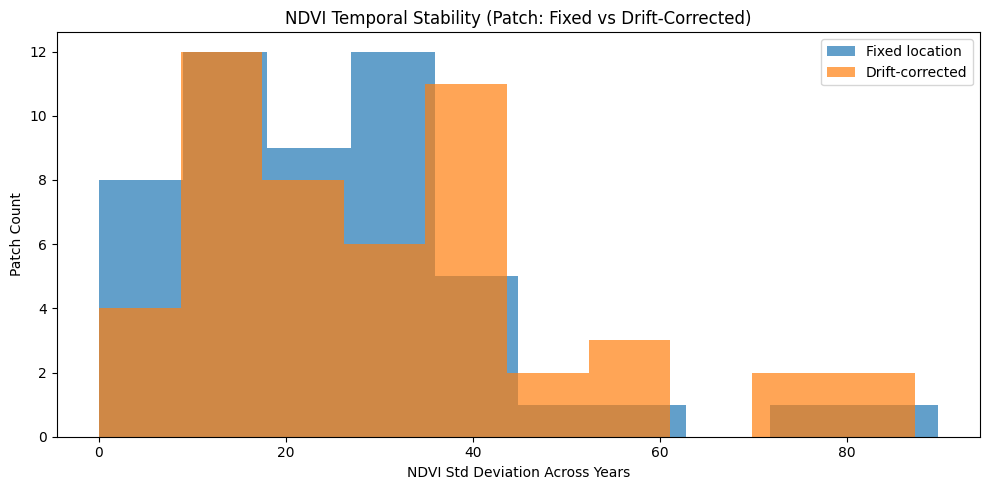


📊 Patch-Level NDVI Drift Comparison:
Mean std (Fixed): 24.53980
Mean std (Corrected): 30.47503
T-statistic: -2.4821
P-value: 0.016535


Analyzing pixel drift:   0%|          | 0/50 [00:00<?, ?it/s]/var/folders/5g/yd1vdsh57t939808t_l412f00000gn/T/ipykernel_39355/570863866.py:26: RuntimeWarning: overflow encountered in scalar subtract
  return (nir - red) / (nir + red + 1e-6)
Analyzing pixel drift: 100%|██████████| 50/50 [00:00<00:00, 945.20it/s]


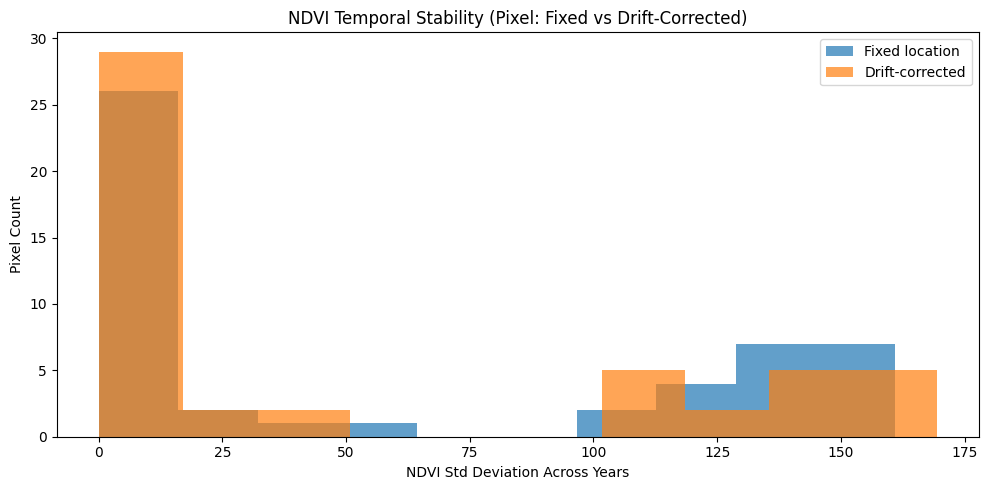


📊 Pixel-Level NDVI Drift Comparison:
Mean std (Fixed): 58.22267
Mean std (Corrected): 49.80597
T-statistic: 0.8280
P-value: 0.411694


In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import ttest_rel
import random

# === CONFIG ===
YEARS = [2014, 2016, 2018, 2020, 2022]
BASE_DIR = "preprocessed_output_{year}/matched_buffer_{year}.tif"
PATCH_SIZE = 5
RADIUS = PATCH_SIZE // 2
DRIFT_RANGE = 3
N_SAMPLES = 50

# === Load images into memory ===
def load_images():
    imgs = {}
    for year in YEARS:
        with rasterio.open(BASE_DIR.format(year=year)) as src:
            imgs[year] = src.read([1, 2, 3, 4])  # RGBNIR
    return imgs

# === Compute NDVI ===
def compute_ndvi(red, nir):
    return (nir - red) / (nir + red + 1e-6)

# === Get NDVI from 5x5 patch ===
def patch_ndvi(patch):
    red, nir = patch[0], patch[3]
    return compute_ndvi(red, nir)

# === Find best-matching patch (MSE-based drift correction) ===
def find_closest_patch(ref_patch, target_band, center, r=RADIUS, search=DRIFT_RANGE):
    min_mse, best_rc = float('inf'), center
    ref_rgb = ref_patch[:3]

    for dr in range(-search, search+1):
        for dc in range(-search, search+1):
            rr, cc = center[0]+dr, center[1]+dc
            if rr - r < 0 or rr + r + 1 > target_band.shape[1] or cc - r < 0 or cc + r + 1 > target_band.shape[2]:
                continue
            candidate = target_band[:3, rr-r:rr+r+1, cc-r:cc+r+1]
            mse = np.mean((ref_rgb - candidate)**2)
            if mse < min_mse:
                min_mse = mse
                best_rc = (rr, cc)
    return best_rc

# === Main analysis ===
def analyze(images, mode="patch"):
    shape = images[YEARS[0]].shape[1:]
    coords = [(random.randint(RADIUS+DRIFT_RANGE, shape[0]-RADIUS-DRIFT_RANGE-1),
               random.randint(RADIUS+DRIFT_RANGE, shape[1]-RADIUS-DRIFT_RANGE-1))
              for _ in range(N_SAMPLES)]
    coords[0] = (119, 224)  # manually insert known tower patch

    fixed_std_list = []
    drift_std_list = []

    for row, col in tqdm(coords, desc=f"Analyzing {mode} drift"):
        fixed_ndvis, drift_ndvis = [], []

        ref_patch = images[2014][:, row-RADIUS:row+RADIUS+1, col-RADIUS:col+RADIUS+1]
        for year in YEARS:
            band = images[year]

            # Fixed
            patch = band[:, row-RADIUS:row+RADIUS+1, col-RADIUS:col+RADIUS+1]
            if mode == "patch":
                ndvi = patch_ndvi(patch).mean()
            else:
                red, nir = band[0, row, col], band[3, row, col]
                ndvi = compute_ndvi(red, nir)
            fixed_ndvis.append(ndvi)

            # Drift
            best_r, best_c = find_closest_patch(ref_patch, band, (row, col))
            if mode == "patch":
                drift_patch = band[:, best_r-RADIUS:best_r+RADIUS+1, best_c-RADIUS:best_c+RADIUS+1]
                drift_ndvi = patch_ndvi(drift_patch).mean()
            else:
                red, nir = band[0, best_r, best_c], band[3, best_r, best_c]
                drift_ndvi = compute_ndvi(red, nir)
            drift_ndvis.append(drift_ndvi)

        fixed_std_list.append(np.std(fixed_ndvis))
        drift_std_list.append(np.std(drift_ndvis))

    return fixed_std_list, drift_std_list

# === Plot results ===
def plot_results(fixed, drift, mode="patch"):
    plt.figure(figsize=(10, 5))
    plt.hist(fixed, bins=10, alpha=0.7, label="Fixed location")
    plt.hist(drift, bins=10, alpha=0.7, label="Drift-corrected")
    plt.xlabel("NDVI Std Deviation Across Years")
    plt.ylabel("Patch Count" if mode == "patch" else "Pixel Count")
    plt.title(f"NDVI Temporal Stability ({'Patch' if mode=='patch' else 'Pixel'}: Fixed vs Drift-Corrected)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    tstat, pval = ttest_rel(fixed, drift)
    print(f"\n📊 {mode.capitalize()}-Level NDVI Drift Comparison:")
    print(f"Mean std (Fixed): {np.mean(fixed):.5f}")
    print(f"Mean std (Corrected): {np.mean(drift):.5f}")
    print(f"T-statistic: {tstat:.4f}")
    print(f"P-value: {pval:.6f}")

# === Run ===
images = load_images()

# Patch-level
fixed_patch, drift_patch = analyze(images, mode="patch")
plot_results(fixed_patch, drift_patch, mode="patch")

# Pixel-level
fixed_pixel, drift_pixel = analyze(images, mode="pixel")
plot_results(fixed_pixel, drift_pixel, mode="pixel")

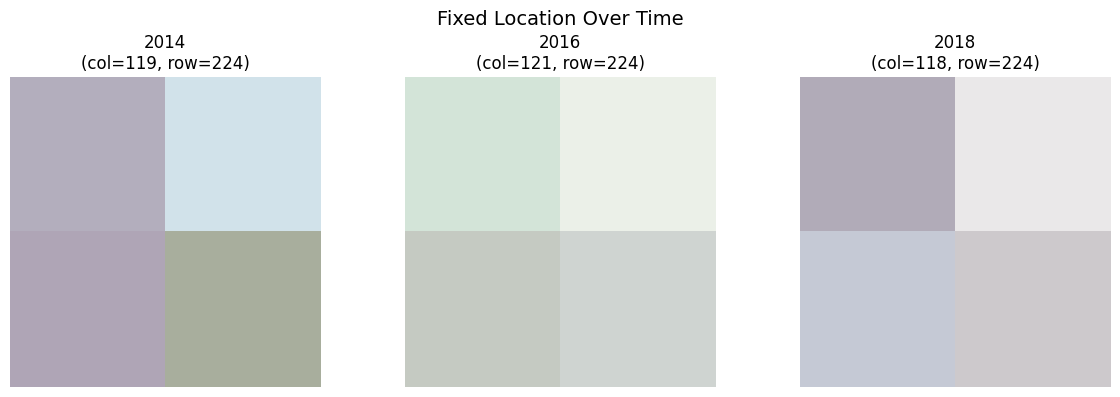

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Specific coordinates for each year (col, row)
LOCATIONS = {
    2014: (119, 224),
    2016: (121, 224),
    2018: (118, 224)
}
BASE_PATH = "preprocessed_output_{year}/matched_buffer_{year}.png"

fig, axs = plt.subplots(1, len(LOCATIONS), figsize=(12, 4))
for i, (year, (col, row)) in enumerate(LOCATIONS.items()):
    path = BASE_PATH.format(year=year)
    
    # Load PNG image using PIL
    with Image.open(path) as img:
        img_array = np.array(img)  # shape: (H, W, 3) for RGB
        patch = img_array[row:row+2, col:col+2]  # shape: (2, 2, 3)

    axs[i].imshow(patch.astype(np.uint8))
    axs[i].set_title(f"{year}\n(col={col}, row={row})")
    axs[i].axis("off")

plt.suptitle("Fixed Location Over Time", fontsize=14)
plt.tight_layout()
plt.show()